In [3]:
#list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
data=r'C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE DETECTION\FIRE DATASET\fire_dataset'

In [3]:
Images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      Images.append(img)

In [4]:
Images[:10]

['C:\\Users\\strydo\\Desktop\\PROJECTS SEICOM\\FIRE DETECTION\\FIRE DATASET\\fire_dataset\\fire_images\\fire.1.png',
 'C:\\Users\\strydo\\Desktop\\PROJECTS SEICOM\\FIRE DETECTION\\FIRE DATASET\\fire_dataset\\fire_images\\fire.10.png',
 'C:\\Users\\strydo\\Desktop\\PROJECTS SEICOM\\FIRE DETECTION\\FIRE DATASET\\fire_dataset\\fire_images\\fire.100.png',
 'C:\\Users\\strydo\\Desktop\\PROJECTS SEICOM\\FIRE DETECTION\\FIRE DATASET\\fire_dataset\\fire_images\\fire.11.png',
 'C:\\Users\\strydo\\Desktop\\PROJECTS SEICOM\\FIRE DETECTION\\FIRE DATASET\\fire_dataset\\fire_images\\fire.12.png',
 'C:\\Users\\strydo\\Desktop\\PROJECTS SEICOM\\FIRE DETECTION\\FIRE DATASET\\fire_dataset\\fire_images\\fire.13.png',
 'C:\\Users\\strydo\\Desktop\\PROJECTS SEICOM\\FIRE DETECTION\\FIRE DATASET\\fire_dataset\\fire_images\\fire.14.png',
 'C:\\Users\\strydo\\Desktop\\PROJECTS SEICOM\\FIRE DETECTION\\FIRE DATASET\\fire_dataset\\fire_images\\fire.15.png',
 'C:\\Users\\strydo\\Desktop\\PROJECTS SEICOM\\FIRE DETE

In [5]:
len(Images)

200

In [6]:
class_label=[]
for i in Images:
  j=i.split('\\')
  class_label.append(j[-2])



In [7]:
class_label[:10]

['fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images',
 'fire_images']

In [8]:
len(class_label)

200

In [9]:
#shuffle two lists with same order
temp=list(zip(Images,class_label))
random.shuffle(temp)
Images,class_label=zip(*temp)
data=pd.DataFrame(list(zip(Images,class_label)),columns=['image_path','class_label'])

In [10]:
data.shape

(200, 2)

In [11]:
data.head()

,image_path,class_label
0,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,non_fire_images
1,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,non_fire_images
2,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,fire_images
3,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,fire_images
4,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,fire_images


In [12]:
data.class_label.value_counts()

non_fire_images    100
fire_images        100
Name: class_label, dtype: int64

In [13]:
data['class_label']=data['class_label'].replace({'fire_images':'Fire','non_fire_images':'No Fire'})

In [14]:
data.class_label.value_counts()

No Fire    100
Fire       100
Name: class_label, dtype: int64

In [15]:
from sklearn.utils import resample
df_c0 = data[data['class_label']== 'Fire']
df_c1 = data[data['class_label']== 'No Fire']

In [16]:
#downsample the majority class
upsampled_df_c0=resample(df_c0,replace=True,random_state=23,n_samples=200)
upsampled_df_c1=resample(df_c1,replace=True,random_state=23,n_samples=200)

In [17]:
#Cobine both
df_upsampled=pd.concat([upsampled_df_c0,upsampled_df_c1])

In [18]:
df_upsampled.head()

,image_path,class_label
163,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,Fire
81,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,Fire
148,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,Fire
119,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,Fire
64,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,Fire


In [19]:
df_upsampled.tail()

,image_path,class_label
83,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,No Fire
165,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,No Fire
60,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,No Fire
100,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,No Fire
0,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,No Fire


In [20]:
df_upsampled.class_label.value_counts()

Fire       200
No Fire    200
Name: class_label, dtype: int64

shuffle

In [21]:
data=df_upsampled.sample(frac=1)
data.head()

,image_path,class_label
131,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,No Fire
140,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,Fire
164,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,No Fire
44,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,No Fire
164,C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE D...,No Fire


Text(0.5, 0, 'Class_label')

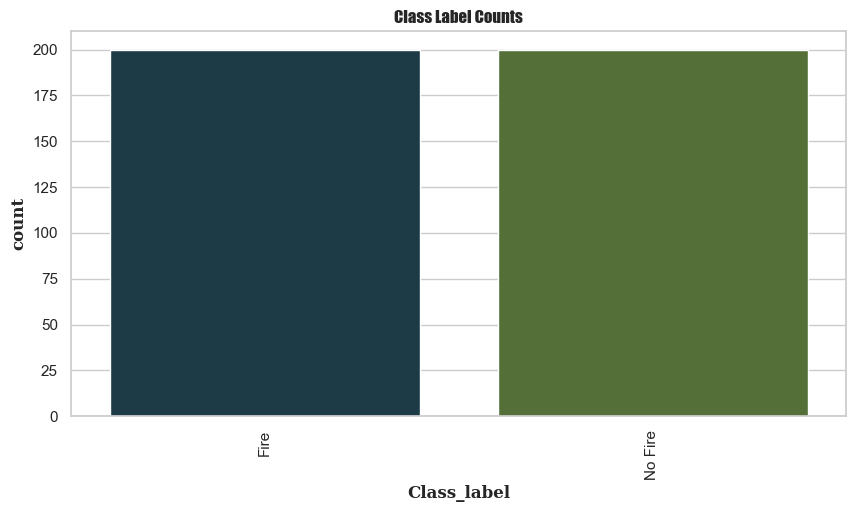

In [22]:
#counts of top 10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class_label", data=df_upsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [23]:
from PIL import Image
def resize_image(img):
  #file = Image.open(img)
  file = cv2.imread(img)
  #img = file.convert('RGB')
  #img_bgr= img.resize((48, 48))
  resized = cv2.resize(file, (224,224), interpolation = cv2.INTER_AREA)
  resized= np.array(resized)
  image = np.reshape(resized,[1,224,224,3])
  #img_bgr = np.array(img_bgr)
  return resized

In [24]:
#save resized images into images.
images = [resize_image(img) for img in data['image_path']]

In [34]:
images = np.array(images)
images.shape

(400, 224, 224, 3)

In [35]:
#print num of classes in our data set
num_classes=len(np.unique(data['class_label']))
num_classes

2

In [36]:
data['class_label'][:5]

131    No Fire
140       Fire
164    No Fire
44     No Fire
164    No Fire
Name: class_label, dtype: object

In [41]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(data['class_label'])
from keras.utils.np_utils  import to_categorical
y = to_categorical(y)

In [42]:
enc.classes_

array(['Fire', 'No Fire'], dtype='<U7')

In [43]:
data['class_label'][:10]

131    No Fire
140       Fire
164    No Fire
44     No Fire
164    No Fire
134       Fire
112    No Fire
3         Fire
198    No Fire
179    No Fire
Name: class_label, dtype: object

In [44]:
y[:10]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [45]:
y=np.array(y)

In [46]:
y[:10]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [47]:
y.shape

(400, 2)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=42)

In [49]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((280, 224, 224, 3), (280, 2), (120, 224, 224, 3), (120, 2))

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
 

In [51]:
# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,224, 224, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                        

In [52]:
#Compile the model
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)

model.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])

C:\Users\strydo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\strydo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [53]:
# Fit the model
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test,y_test),batch_size = 128)

Epoch 1/10
3/3 [==============================] - 237s 70s/step - loss: 37.2021 - accuracy: 0.4786 - val_loss: 1.4915 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 235s 73s/step - loss: 2.9673 - accuracy: 0.5357 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 253s 75s/step - loss: 0.7807 - accuracy: 0.5250 - val_loss: 0.6378 - val_accuracy: 0.6167
Epoch 4/10
3/3 [==============================] - 237s 73s/step - loss: 0.6762 - accuracy: 0.6036 - val_loss: 0.5656 - val_accuracy: 0.9333
Epoch 5/10
3/3 [==============================] - 256s 78s/step - loss: 0.4383 - accuracy: 0.8179 - val_loss: 0.7301 - val_accuracy: 0.5500
Epoch 6/10
3/3 [==============================] - 225s 69s/step - loss: 1.7254 - accuracy: 0.5321 - val_loss: 0.6751 - val_accuracy: 0.6500
Epoch 7/10
3/3 [==============================] - 225s 68s/step - loss: 0.6592 - accuracy: 0.6143 - val_loss: 0.6292 - val_accuracy: 0.8667
Epoch 8/10
3/3 [===

In [54]:
file_name =  r'C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE DETECTION\FIRE DATASET\fire_CNN.h5'

tf.keras.models.save_model(model,file_name)

In [55]:
# print the test accuracy
score_2 = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])

Test accuracy: 0.8583333492279053


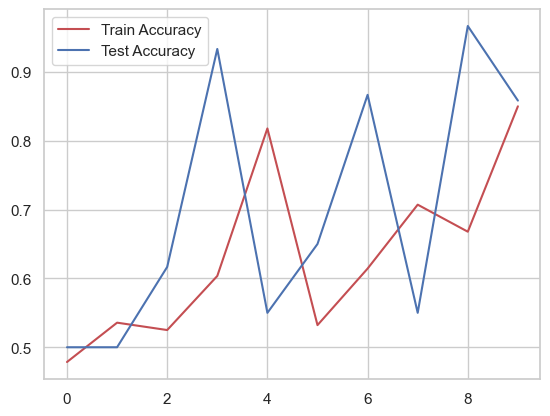

In [57]:
# plot the accuracy plot
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

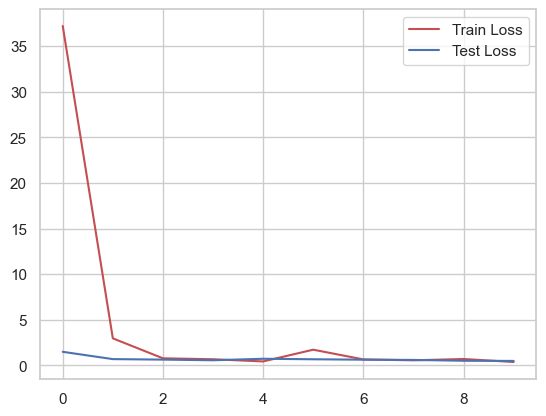

In [59]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

4/4 [==============================] - 29s 6s/step


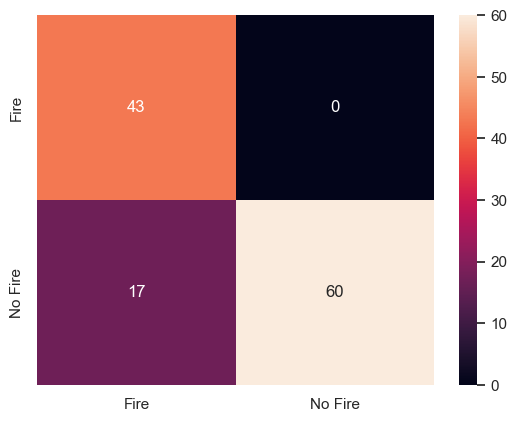

In [60]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

1/1 [==============================] - 4s 4s/step
Predicted class: Fire
Actual class: Fire


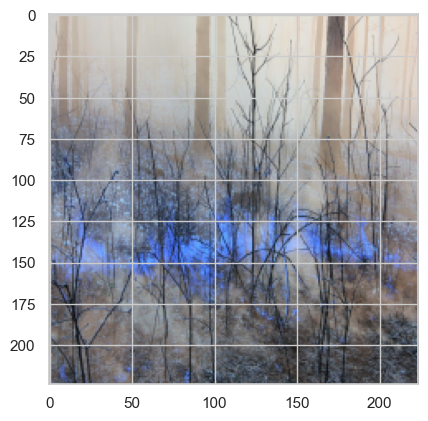

In [82]:
i = 78
pred = np.argmax(model.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test[i])

In [62]:
# Creating results data frame 
results = pd.DataFrame(columns=['model', 'Test-Accuracy' ])
new = ['CNN ',score_2]
results.loc[0] = new

In [63]:
# import the vgg16 model
from keras.applications.vgg16 import VGG16

In [64]:
vgg=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [65]:
vgg.trainable=False

In [66]:
# Set the vgg16 model
model_1=Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(2, activation='softmax'))

In [67]:
#Compile the model
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)

model_1.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])

C:\Users\strydo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\strydo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [68]:
from keras.callbacks import ModelCheckpoint
filepath="/content/drive/My Drive/Alzheimers_weights-improvement_vgg16-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [69]:
#Fit the data or train the models
History_1 = model_1.fit(X_train, y_train, epochs = 10, validation_data = (X_test,y_test),batch_size = 64)

Epoch 1/10
5/5 [==============================] - 534s 109s/step - loss: 50.1077 - accuracy: 0.6786 - val_loss: 7.5198 - val_accuracy: 0.5833
Epoch 2/10
5/5 [==============================] - 498s 105s/step - loss: 3.1255 - accuracy: 0.8750 - val_loss: 0.8955 - val_accuracy: 0.9583
Epoch 3/10
5/5 [==============================] - 501s 106s/step - loss: 0.9340 - accuracy: 0.9714 - val_loss: 0.8736 - val_accuracy: 0.9333
Epoch 4/10
5/5 [==============================] - 500s 105s/step - loss: 0.9133 - accuracy: 0.9750 - val_loss: 0.7038 - val_accuracy: 0.9583
Epoch 5/10
5/5 [==============================] - 496s 104s/step - loss: 0.6869 - accuracy: 0.9821 - val_loss: 0.6472 - val_accuracy: 0.9417
Epoch 6/10
5/5 [==============================] - 497s 105s/step - loss: 0.6655 - accuracy: 0.9821 - val_loss: 0.4970 - val_accuracy: 0.9667
Epoch 7/10
5/5 [==============================] - 9616s 2384s/step - loss: 0.6535 - accuracy: 0.9821 - val_loss: 0.4754 - val_accuracy: 0.9417
Epoch 8/10

In [78]:
file_name =  r'C:\Users\strydo\Desktop\PROJECTS SEICOM\FIRE DETECTION\FIRE DATASET\fire_VGG16.h5'

tf.keras.models.save_model(model_1,file_name)

4/4 [==============================] - 208s 43s/step


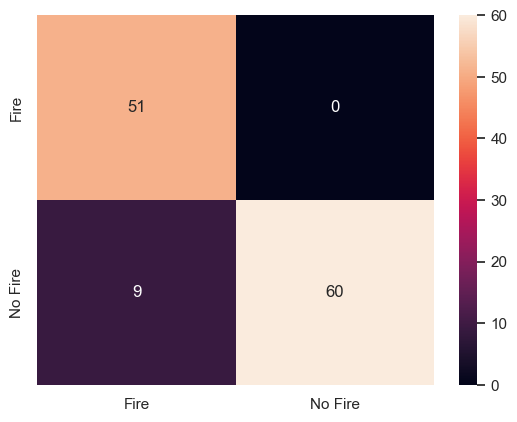

In [79]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_1.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

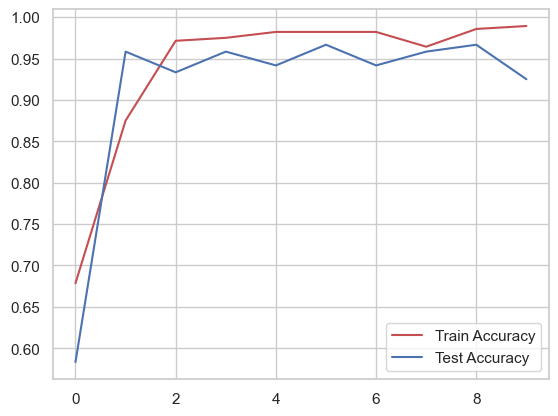

In [72]:
#Plot the accuracy plot
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

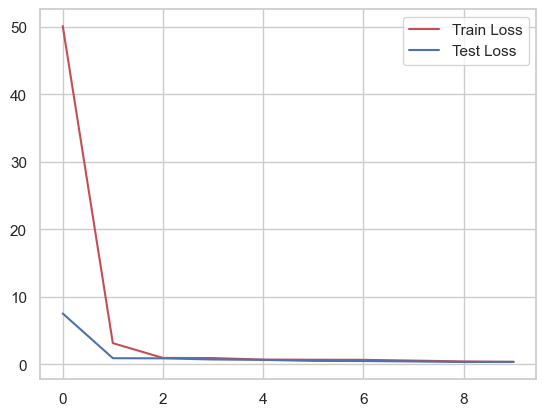

In [73]:
#Plot the loss plot
plt.plot(History_1.history['loss'], 'r')
plt.plot(History_1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [74]:
#print the test accuracy
score_1 = model_1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_1[1])

Test accuracy: 0.925000011920929


1/1 [==============================] - 6s 6s/step
Predicted class: Fire
Actual class: Fire


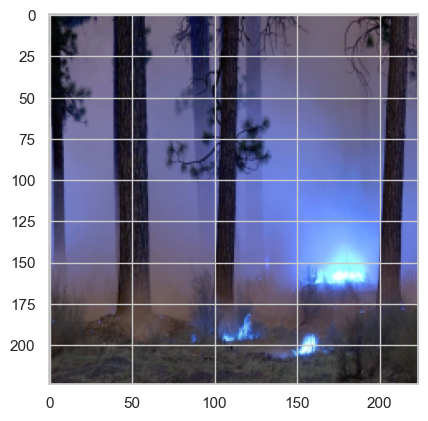

In [81]:
i = 20
pred = np.argmax(model_1.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test[i])